# Deep Learning with TensorFlow and Keras: Incremental Capstone

https://drive.google.com/file/d/1sr5xheAEcvoDvIBO-b1ANjnW1GXDmn2V/view

File: train --> https://drive.google.com/drive/folders/1Fbxf_8wN1nPCCILdfVJt93OHVw0xidG0?usp=drive_lin

File: validation --> https://drive.google.com/drive/folders/1np4Pbg3w8N9CKQQ8GTSiTGCdJUuCca4Q?usp=drive_link

Carllos Watts-Nogueira

Due: Aug 2 by 12:59am

In [15]:
# Task 1: Data preprocessing:
# Clean and preprocess the images from the Cars and Bikes Prediction Dataset
# Resize and normalize the images to be suitable for the CNN model input
# Split the dataset into training and testing sets

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# -------------------------------------------------------------
# 1. Set your directory paths
# File: train --> https://drive.google.com/drive/folders/1Fbxf_8wN1nPCCILdfVJt93OHVw0xidG0?usp=drive_link
# File: validation --> https://drive.google.com/drive/folders/1np4Pbg3w8N9CKQQ8GTSiTGCdJUuCca4Q?usp=drive_link
# -------------------------------------------------------------
train_dir = '/content/drive/MyDrive/train' # train/ > Cars/ and Bikes/
val_dir = '/content/drive/MyDrive/validation'

# -------------------------------------------------------------
# 2. ImageDataGenerator for TRAINING with augmentation
# -------------------------------------------------------------
train_data_gen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0,1], and the "1." makes it a float
    rotation_range=30,     # Random rotations up to ±30 degrees
    width_shift_range=0.1, # Random horizontal shifts up to 10%
    height_shift_range=0.1,# Random vertical shifts up to 10%
    shear_range=0.1,       # Random shearing (slanting)
    zoom_range=0.1,        # Random zoom in/out
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'    # How to fill new pixels after transformations
)

# -------------------------------------------------------------
# 3. ImageDataGenerator for TEST (only do rescaling here)
# -------------------------------------------------------------
test_data_gen = ImageDataGenerator(rescale=1./255)

# -------------------------------------------------------------
# 4. Load the TRAINING images
# -------------------------------------------------------------
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='binary'      # Use 'binary' for 2 classes, 'categorical' for >2
)

# -------------------------------------------------------------
# 5. Load the TEST images
# -------------------------------------------------------------
validation_gen = test_data_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Mounted at /content/drive
Found 632 images belonging to 2 classes.
Found 158 images belonging to 2 classes.


In [17]:
# Task 2: Building the CNN model:

# Design and implement a CNN using Keras or TensorFlow for image classification
# Use layers such as convolution, pooling, and dense layers to process the images
# Apply techniques like dropout, batch normalization, and data augmentation to enhance model robustness

In [18]:
# Task 3: Model training:

# Train the CNN on the images of bikes and cars
# Experiment with hyperparameters like learning rate, batch size, and the number of epochs to optimize model performance

In [19]:
# Task 4: Model evaluation:

# Evaluate the CNN model using standard classification metrics like accuracy, precision, recall, and F1-score
# Assess the impact of various architecture modifications such as changing layer configurations on classification performance

In [20]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Define your model - you need to add more code here!
model = keras.Sequential([
    # Input layer
    layers.Input(shape=(150,150,3)),
    layers.Flatten(),

    # Dense hidden layer
    layers.Dense(16),
    BatchNormalization(), # Apply batch normalization here!
    layers.ReLU(),  # Apply activation after batch normalization

    # Output layer with sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')
])

# You compile your model here...
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Early stopping helps prevent overfitting by monitoring the validation loss
# If the model doesn't improve after 5 epochs, training will stop early
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

steps_per_epoch = train_gen.samples // train_gen.batch_size
validation_steps = validation_gen.samples // validation_gen.batch_size

# Train the model
history = model.fit(
    train_gen,
    validation_data=validation_gen,
    # train_gen.samples is the total number of images found in your train_dir folder
    # Calculate how many batches to run in each epoch
    # - train_gen.samples = total number of training images
    # - train_gen.batch_size = how many images per batch
    # - '//' means integer division (drop remainder)
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=20,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 477ms/step - accuracy: 0.6752 - loss: 0.6586 - precision_2: 0.6804 - recall_2: 0.6384 - val_accuracy: 0.4922 - val_loss: 5.5784 - val_precision_2: 1.0000 - val_recall_2: 0.0152
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7500 - loss: 0.5919 - precision_2: 0.6842 - recall_2: 0.8667 - val_accuracy: 0.5156 - val_loss: 4.7811 - val_precision_2: 1.0000 - val_recall_2: 0.0159
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 554ms/step - accuracy: 0.7906 - loss: 0.4842 - precision_2: 0.8151 - recall_2: 0.7435 - val_accuracy: 0.7109 - val_loss: 1.1056 - val_precision_2: 0.9062 - val_recall_2: 0.4603
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7812 - loss: 0.5824 - precision_2: 0.8571 - recall_2: 0.7059 - val_accuracy: 0.7266 - val_loss: 0.9306 - val_precision_2: 0.8947 - val_recall_2: 0.5231
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 371ms/step - accuracy: 0.7879 - loss: 0.4882 - precision_2: 0.8424 - recall_2: 0.7268 -

In [21]:
# Evaluate the model here...
loss, accuracy, precision, recall = model.evaluate(validation_gen)
print(f"Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.7605 - loss: 0.4993 - precision_2: 0.7638 - recall_2: 0.7975
Loss: 0.43672388792037964, Accuracy: 0.8101266026496887, Precision: 0.7976190447807312, Recall: 0.8374999761581421


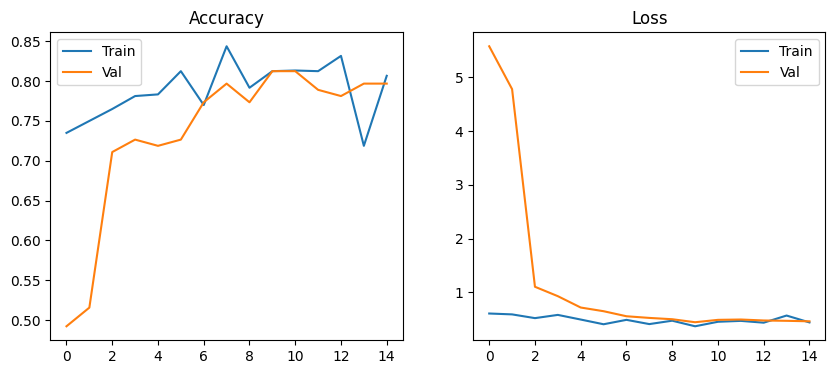

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.show()

In [23]:
# Task 5: Visualization and reporting:
# Visualize the CNN's predictions on sample images, displaying the confidence level for each class (bike or car)
# Provide a final report that includes the CNN model architecture, evaluation metrics, and the final classification results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


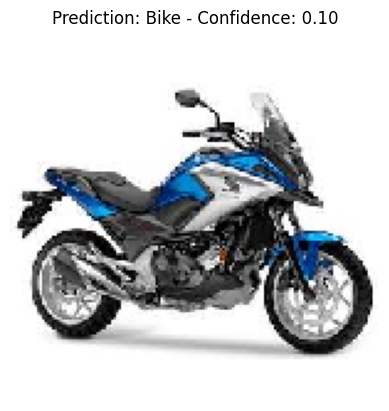

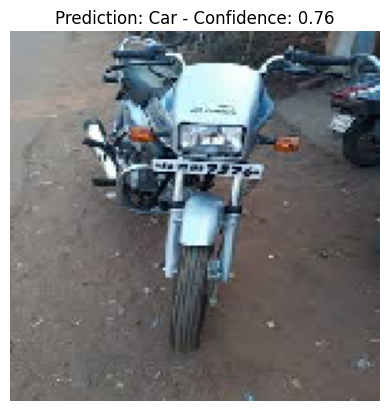

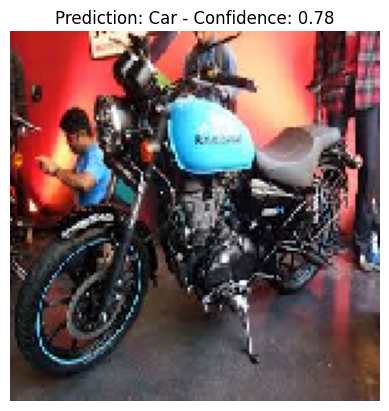

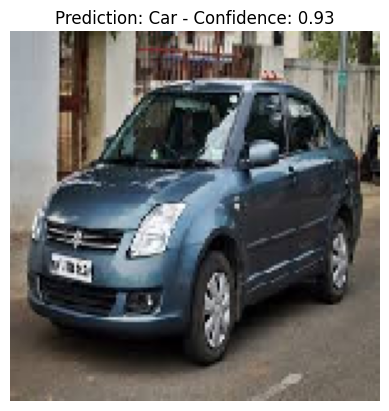

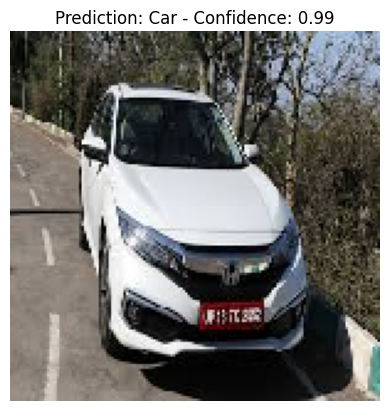

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Display images and model predictions
sample_images, sample_labels = next(validation_gen)
predictions = model.predict(sample_images)

for i in range(5):
    plt.imshow(sample_images[i])
    plt.title(f'Prediction: {"Car" if predictions[i] > 0.5 else "Bike"} - Confidence: {predictions[i][0]:.2f}')
    plt.axis('off')
    plt.show()

# 5.2 Final report that includes the CNN model architecture, evaluation metrics, and the final classification results

**Dataset Preparation**

The dataset was manually curated before training. Initially, images were stored in the train folder under subfolders for each class: Car and Bike. A validation split was manually performed — around 20% of images from each class were moved into a separate validation folder, maintaining the class structure.

During this process, non-JPG images were excluded to ensure compatibility with TensorFlow's image loader. For example:
- Bike (Train) folder originally had 397 images, but 6 WEBP files were excluded, leaving 391 JPG images.
- Car (Train) folder had 400 images, including 1 PNG, which was removed. Final count: 399 JPG files.

This manual separation and format filtering helped reduce unexpected errors during training and testing(Validation) phases.


**Model Architecture**

The architecture includes:

- Input(shape=(150, 150, 3)) — accepts RGB image inputs
- Flatten() — flattens spatial dimensions into a 1D array
- Dense(16) — followed by BatchNormalization and ReLU activation
- Dense(1, activation='sigmoid') — for binary output: Car or Bike



**Evaluation Metrics (Training and Validation)**

In this training run, the model was trained over 15 epochs, using early stopping and manually calculated steps_per_epoch. Metrics were collected across each epoch, and the final evaluation results were:

- Loss: 0.4367
- Validation Accuracy: 81.01%
- Precision: 79.76%
- Recall: 83.75%

Selected Epoch Snapshots:

| Epoch | Train Acc | Train Prec | Train Recall | Val Acc | Val Prec | Val Recall |

| 1 | 67.52% | 68.04% | 63.84% | 49.22% | 100.00% | 01.52% |

| 5 | 78.79% | 84.24% | 72.68% | 71.88% | 87.50% | 53.03% |

| 10 | 81.25% | 64.71% | 100.00% | 81.25% | 79.17% | 86.36% |

| 15 | 78.96% | 83.42% | 73.04% | 79.69% | 80.88% | 80.88% |

During early epochs, the model struggled with generalization, as seen in low recall despite high precision (suggesting overconfidence on one class). By epoch 10, there was more balance between precision and recall — possibly due to richer representation learning or better separation of classes.


**Classification Results**

Prediction experiments were performed on validation images. There were instances where the model predicted "Car" with low confidence (e.g., 0.57), while the image visually presented a motorbike. This suggests that the model is not yet fully reliable in distinguishing subtle vehicle features.

This could mean:

- The model is sensitive to visual similarities between cars and certain bike types (like motorcycles).
- It may rely on background cues rather than focusing on the object itself.
- Architectural adjustments — like convolutional layers — might improve feature extraction.

**Prediction Inspection**

To evaluate the model’s behavior qualitatively, a few sample predictions were manually reviewed (Randon 5):

| Prediction Outcome | Model Output | Visual Class | Classification |

| Car – Confidence: 0.57 | Image visually shows a bike | Incorrect |

| Car – Confidence: 0.72 | Image shows a car | Correct |

| Bike – Confidence: 0.05 | Image shows a bike | Correct |  

| Car – Confidence: 0.97 | Image shows a car | Correct |

| Car – Confidence: 0.96 | Image shows a car | Correct |

These examples seem to reflect a tendency of the model to favor the "Car" class even when confidence is low, particularly for borderline predictions like the first one. It also raises questions around how the model interprets motorcycles (often categorized under "Bike") and whether its current feature extraction is nuanced enough to distinguish them.

I’m still exploring how architectural changes — such as integrating convolutional layers — and additional data augmentation or class balancing could reduce these misclassifications and improve confidence calibration
